In [9]:

import numpy as np
import imp
%matplotlib inline
import matplotlib.pyplot as plt
from klusta.kwik import KwikModel
#from phy.io import KwikModel
import matplotlib as mpl
from pylab import *
import random

import ipywidgets as widgets
from IPython.display import display
import time

import sys 
sys.path.append('/home/harison/UFPE/IC/src/ipy/classes/') 
import kwikfile as kf


class ColorMap:
    """!  @brief model that returns an average detection of each site of a given kwik file.
    
    @author: Harison P B de Oliveira
    @date: 2018.May.23
    """
    
    def __init__(self,kpath=None,name=None):
        if kpath is None:
            print ("It still with no path")
        else:
            self.kwik_model=KwikModel(kpath)
            self.kwikfile=kf.KwikFile(kpath)
            self.kpath=kpath
            if name is None:
                self.name=self.kwikfile.name
            else:
                self.name=name
            #print ("Created class on = %s !" % self.kpath)
            
    def get_median_amplitude_group(self):
        """!  @brief Returns the average amplitude of all sites of the non-noisy groups.
    
        @author: Harison P B de Oliveira
        @date: 2018.Jun.07
        """
        
        spk_id=self.kwikfile.all_spike_id_on_groups(group_names=self.kwikfile.list_of_non_noisy_groups())
        w=self.kwik_model.all_waveforms
        #wf=w[spk_id]
        #spk_id2=random.shuffle(spk_id)
        #print(spk_id2)
        #print(len(spk_id2))
        wf=w[spk_id[0:20000]]
        median_amplitudes=dict()
        amplitudes=[]
        print("Loading the average amplitude for each site.")
        
        
        
        #a=np.zeros((6,10))
        #for shank in range(0,6):
        A=dict()
        amplitudes=[]
        progress = widgets.IntProgress(min=0, description='Loading channels:'
                                   ,max=wf.shape[2])#add kwikfile
        display(progress)
        for elect in range(0,wf.shape[2]):#add kwikfile
            A[elect]=[]
            for i in range(0,len(wf)):
                wave=wf[i,:,elect]
                A[elect].append(np.max(wave)-np.min(wave))
            amplitudes.append(np.mean(A[elect]))
            progress.value += 1
            #a[shank,:]=amplitudes
            """
        a=np.zeros((6,10))
        for i in range(0,6):
            a[i,:]=amplitudes
        """
        return amplitudes

        
    def plot_median_amplitude(self,amplitudes=None):
        """!  @brief Returns an image with maximum average amplitude of each site of a shank.
    
        @author: Harison P B de Oliveira
        @date: 2018.Jun.07
        """
        
        if amplitudes is None:
            return None
        else:
            fig,ax = plt.subplots(figsize=(60, 20))
            num_channels=len(amplitudes)

            posx=np.flipud (self.kwik_model.channel_positions [:,0])
            posy=np.flipud (self.kwik_model.channel_positions [:,1])
            #print(posx,posy)
            cmap = mpl.cm.jet
            norm = mpl.colors.Normalize(vmin=np.min(amplitudes), vmax=np.max(amplitudes))
            cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                    norm=norm,
                                    extend='both',
                                    extendfrac='auto',
                                    spacing='uniform',
                                    orientation='vertical') 
            a=list()
            
            
            dx=10
            #offset=shank*200
            for ch in range (0,10):
                if ch%2==0:
                    x_offset=posx[ch]+dx
                else:
                    x_offset=posx[ch]-dx
                    dx+=10
                #x_offset = posx[ch]
                y_offset =posy[ch]*2
                circle = plt.Circle((x_offset,y_offset),10,color=cb1.to_rgba(amplitudes[ch]))
                a.append(circle)
            
            ax.cla()
            ax.set_xlim((min(posx)-dx-10, max(posx)+dx+1100))
            ax.set_ylim((min(posy)*2-10, max(posy)*2+10))
            for i in range(0,len(a)):
                c=a[i]
                ax.add_artist(c)
            
            data = np.clip(randn(0, 0), -1, 1)
            cax = ax.imshow(data, interpolation='None', cmap=cm.jet)
            cbar = fig.colorbar(cax,ticks=[0,0.5,1],orientation='vertical')
            cbar.ax.set_yticklabels(['Low','Medium','High'])
            plt.gca().invert_yaxis()
            plt.axis('off')

            plt.show()
            
            
        

In [14]:
#kpath='/home/harison/UFPE/data/2016Mar15/02/g02.kwik'
kpath='/home/harison/UFPE/data/2016Apr06/01/g01.kwik'
hm = ColorMap(kpath)

Created class on = /home/harison/UFPE/data/2016Apr06/01/g01.kwik !


In [15]:
ampl=hm.get_median_amplitude_group()

Loading the average amplitude for each site.


IntProgress(value=0, description='Loading channels:', max=10)

6Apr

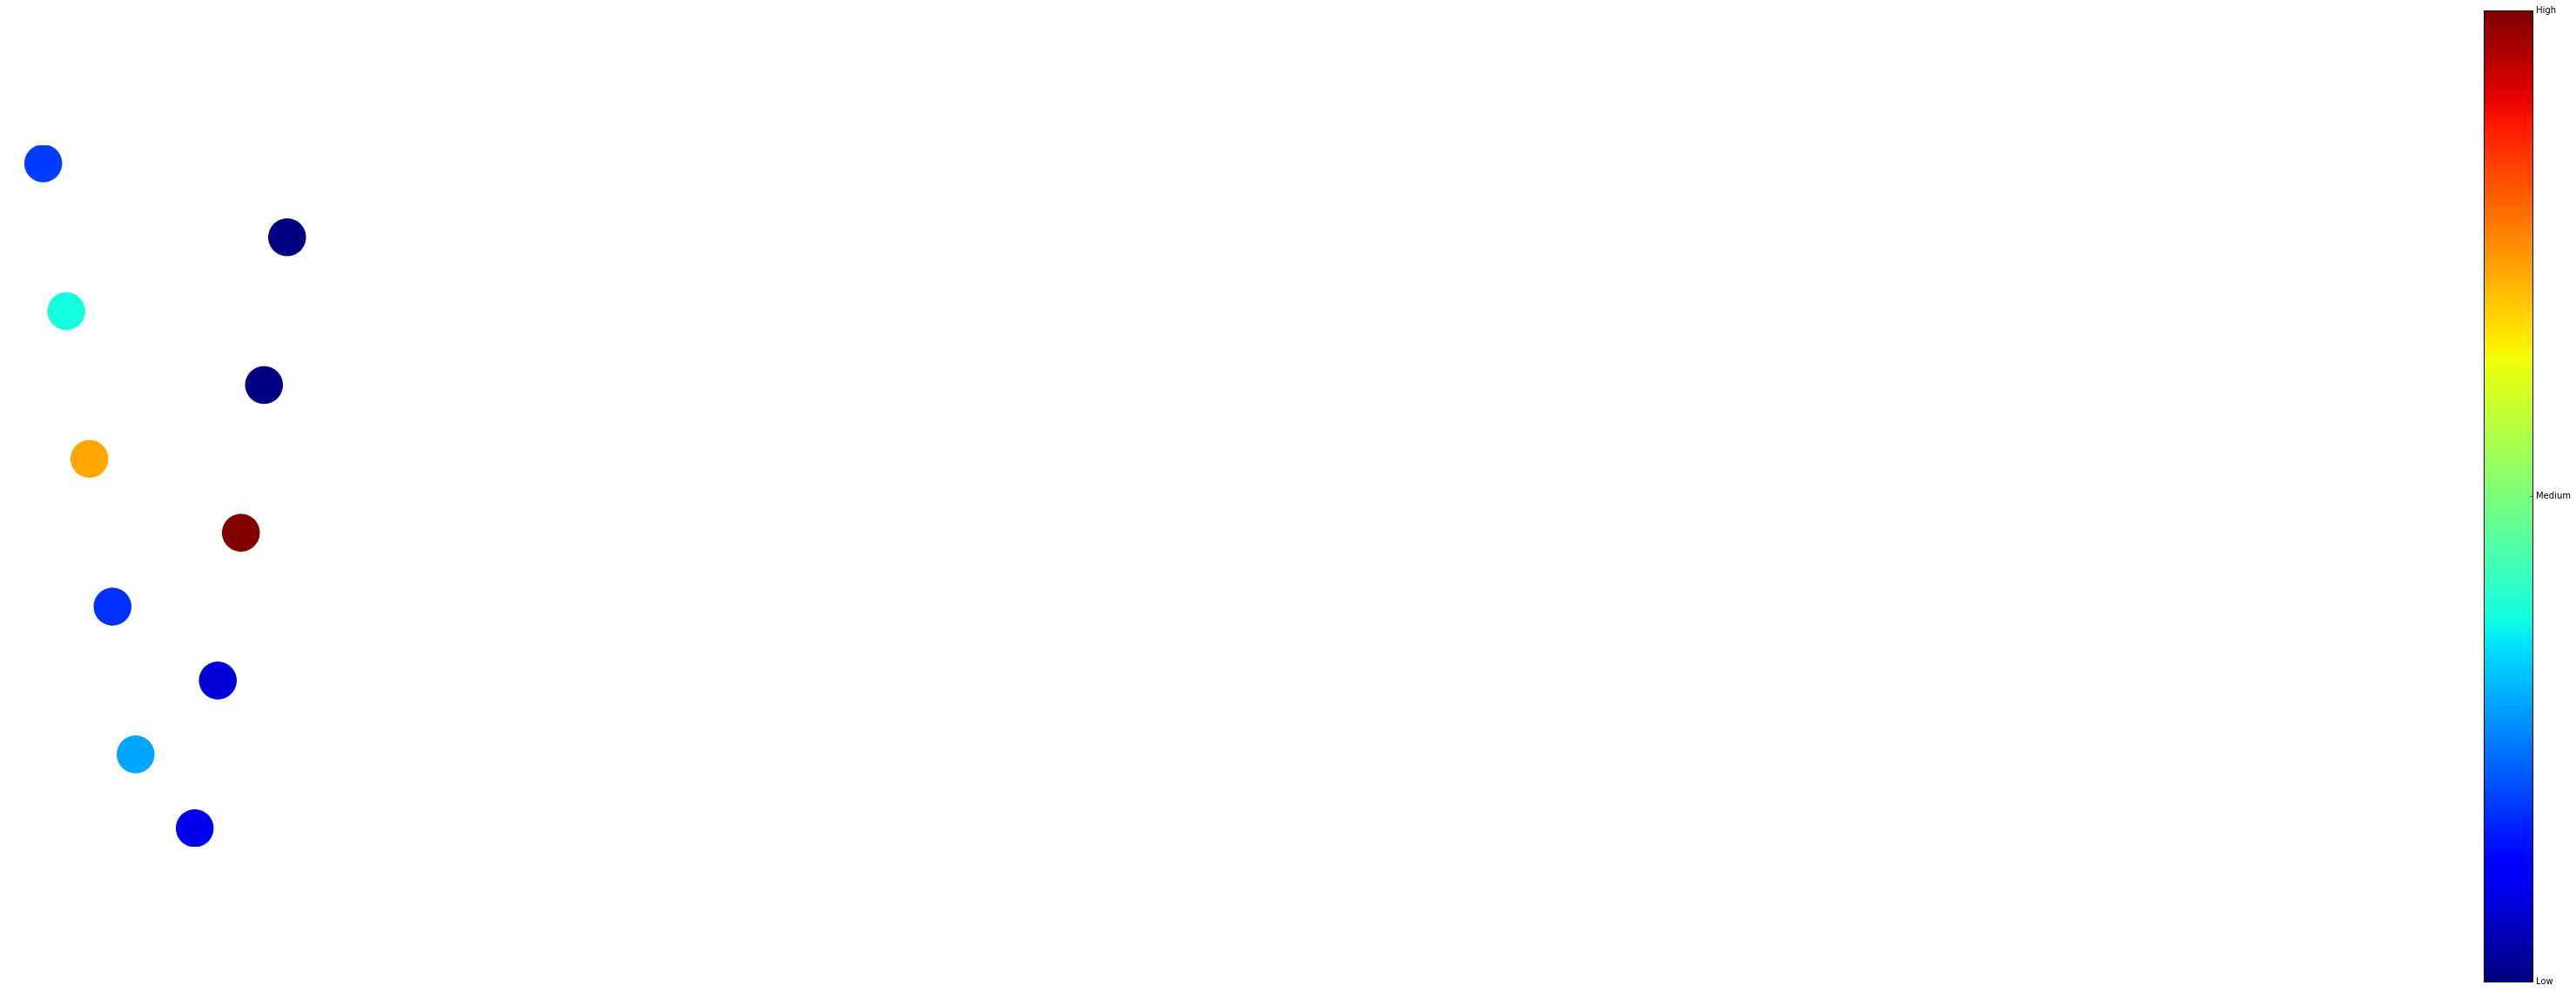

In [16]:
hm.plot_median_amplitude(ampl)
#g01 #10000

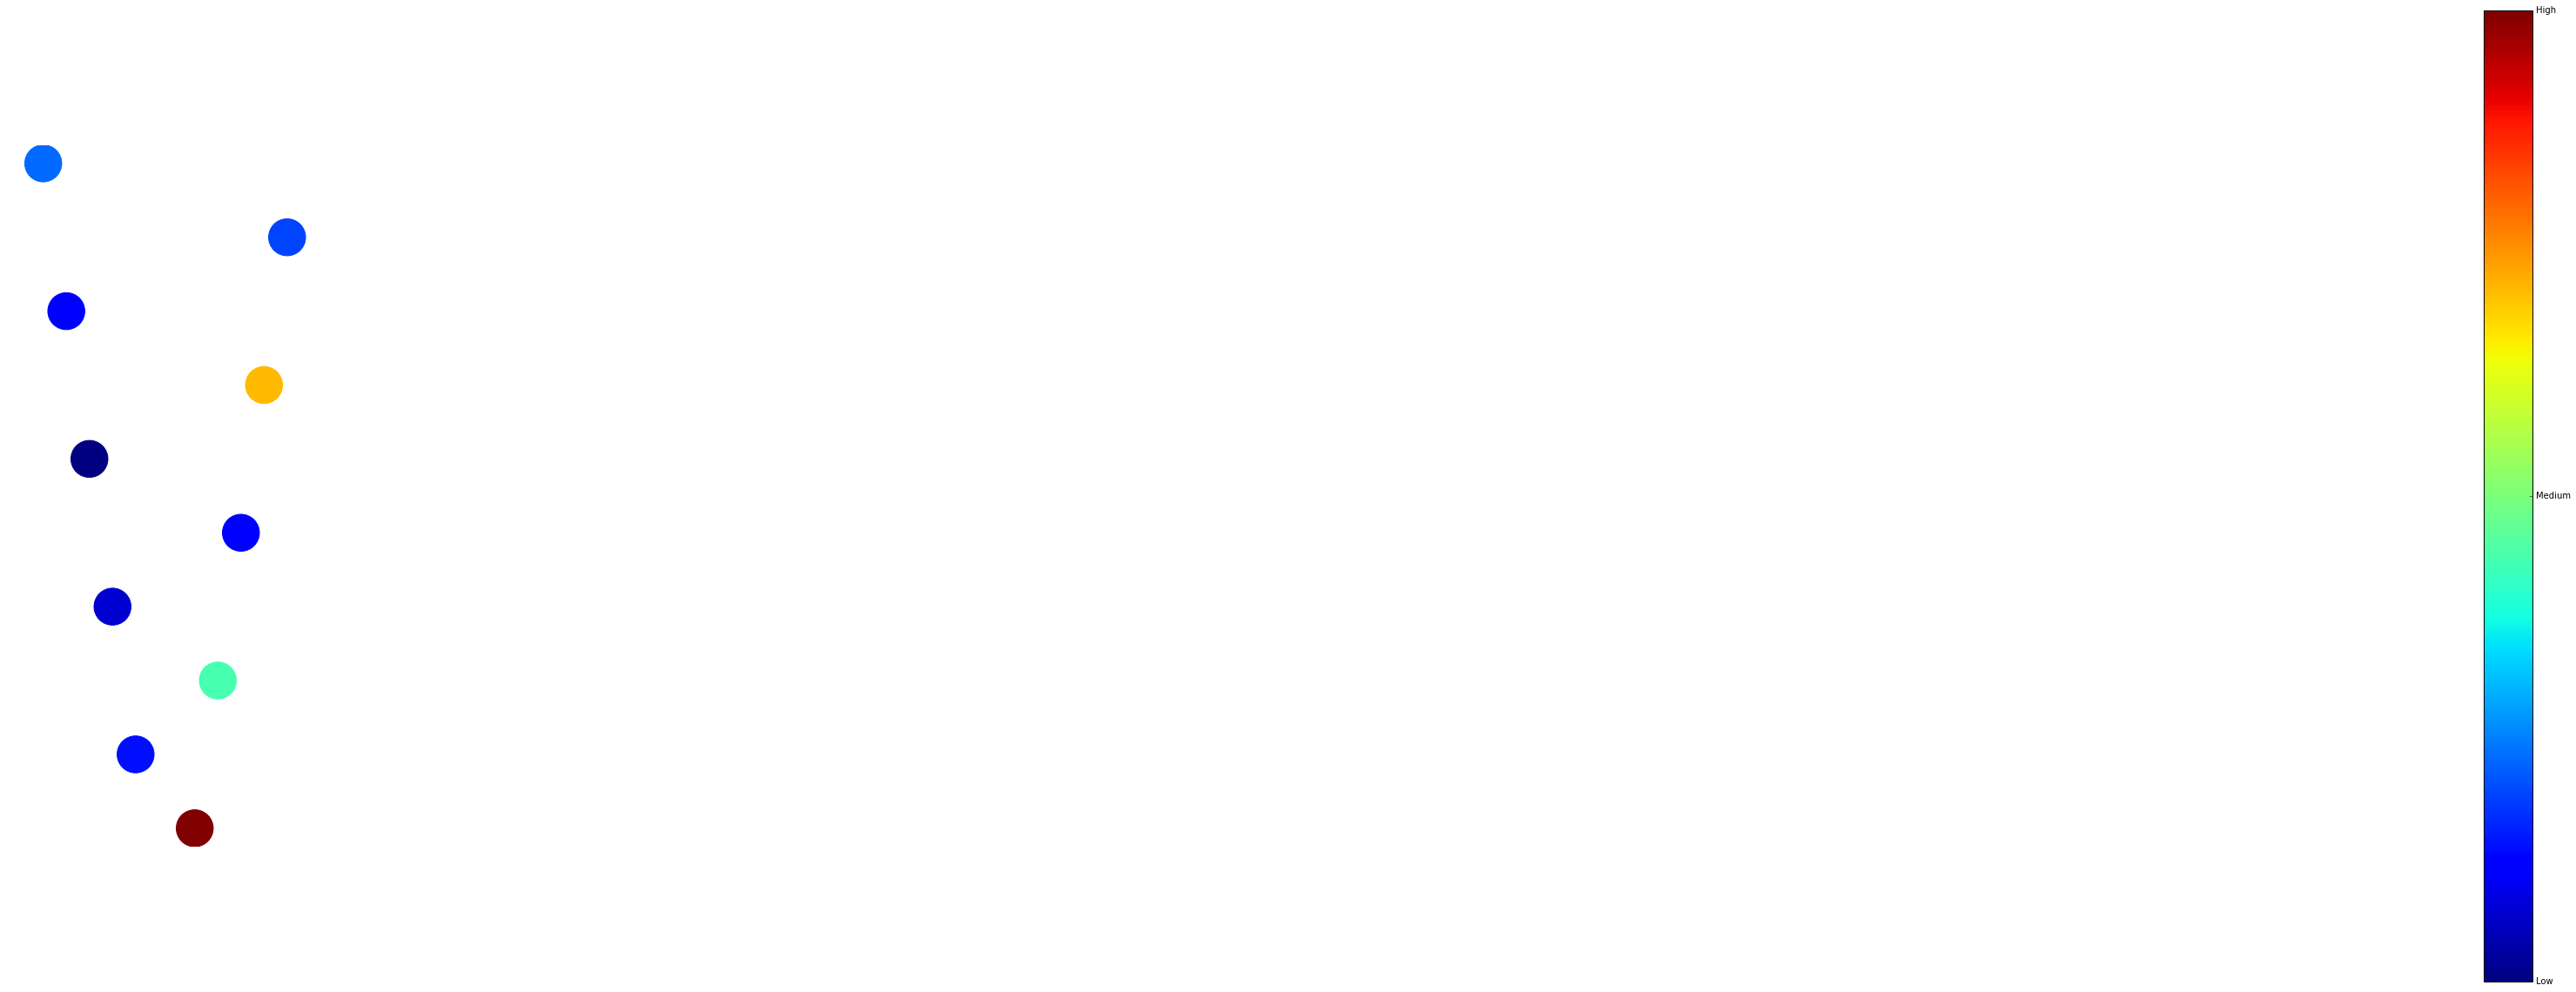

In [13]:
hm.plot_median_amplitude(ampl)
#g01 #10000

15Mar

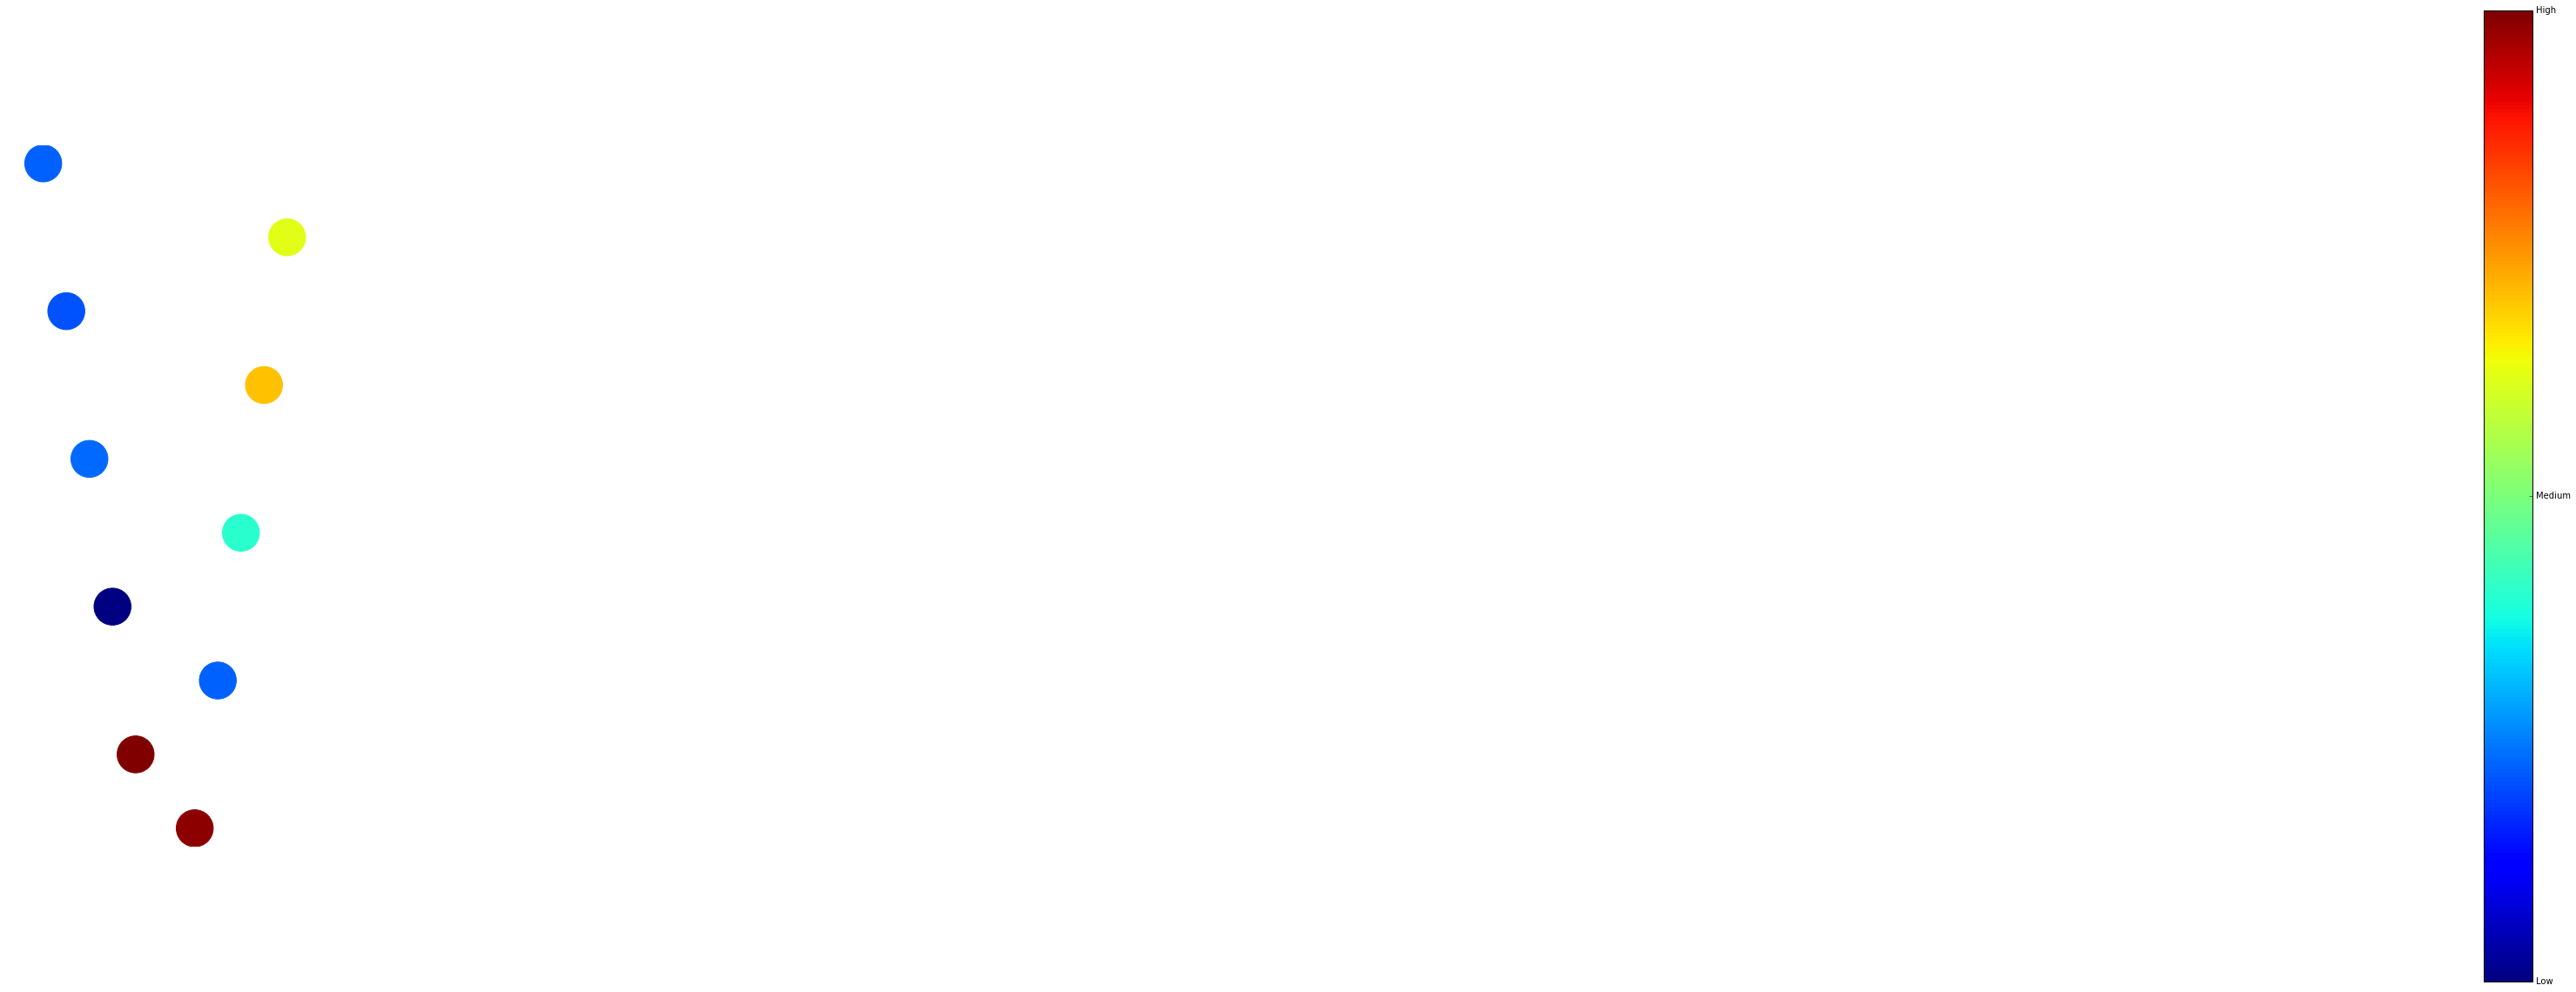

In [13]:
hm.plot_median_amplitude(ampl)
#g01

[75.439766, 89.549377, 100.60338, 96.780968, 47.963482, 86.624985, 52.321541, 68.842682, 40.191742, 103.76319]


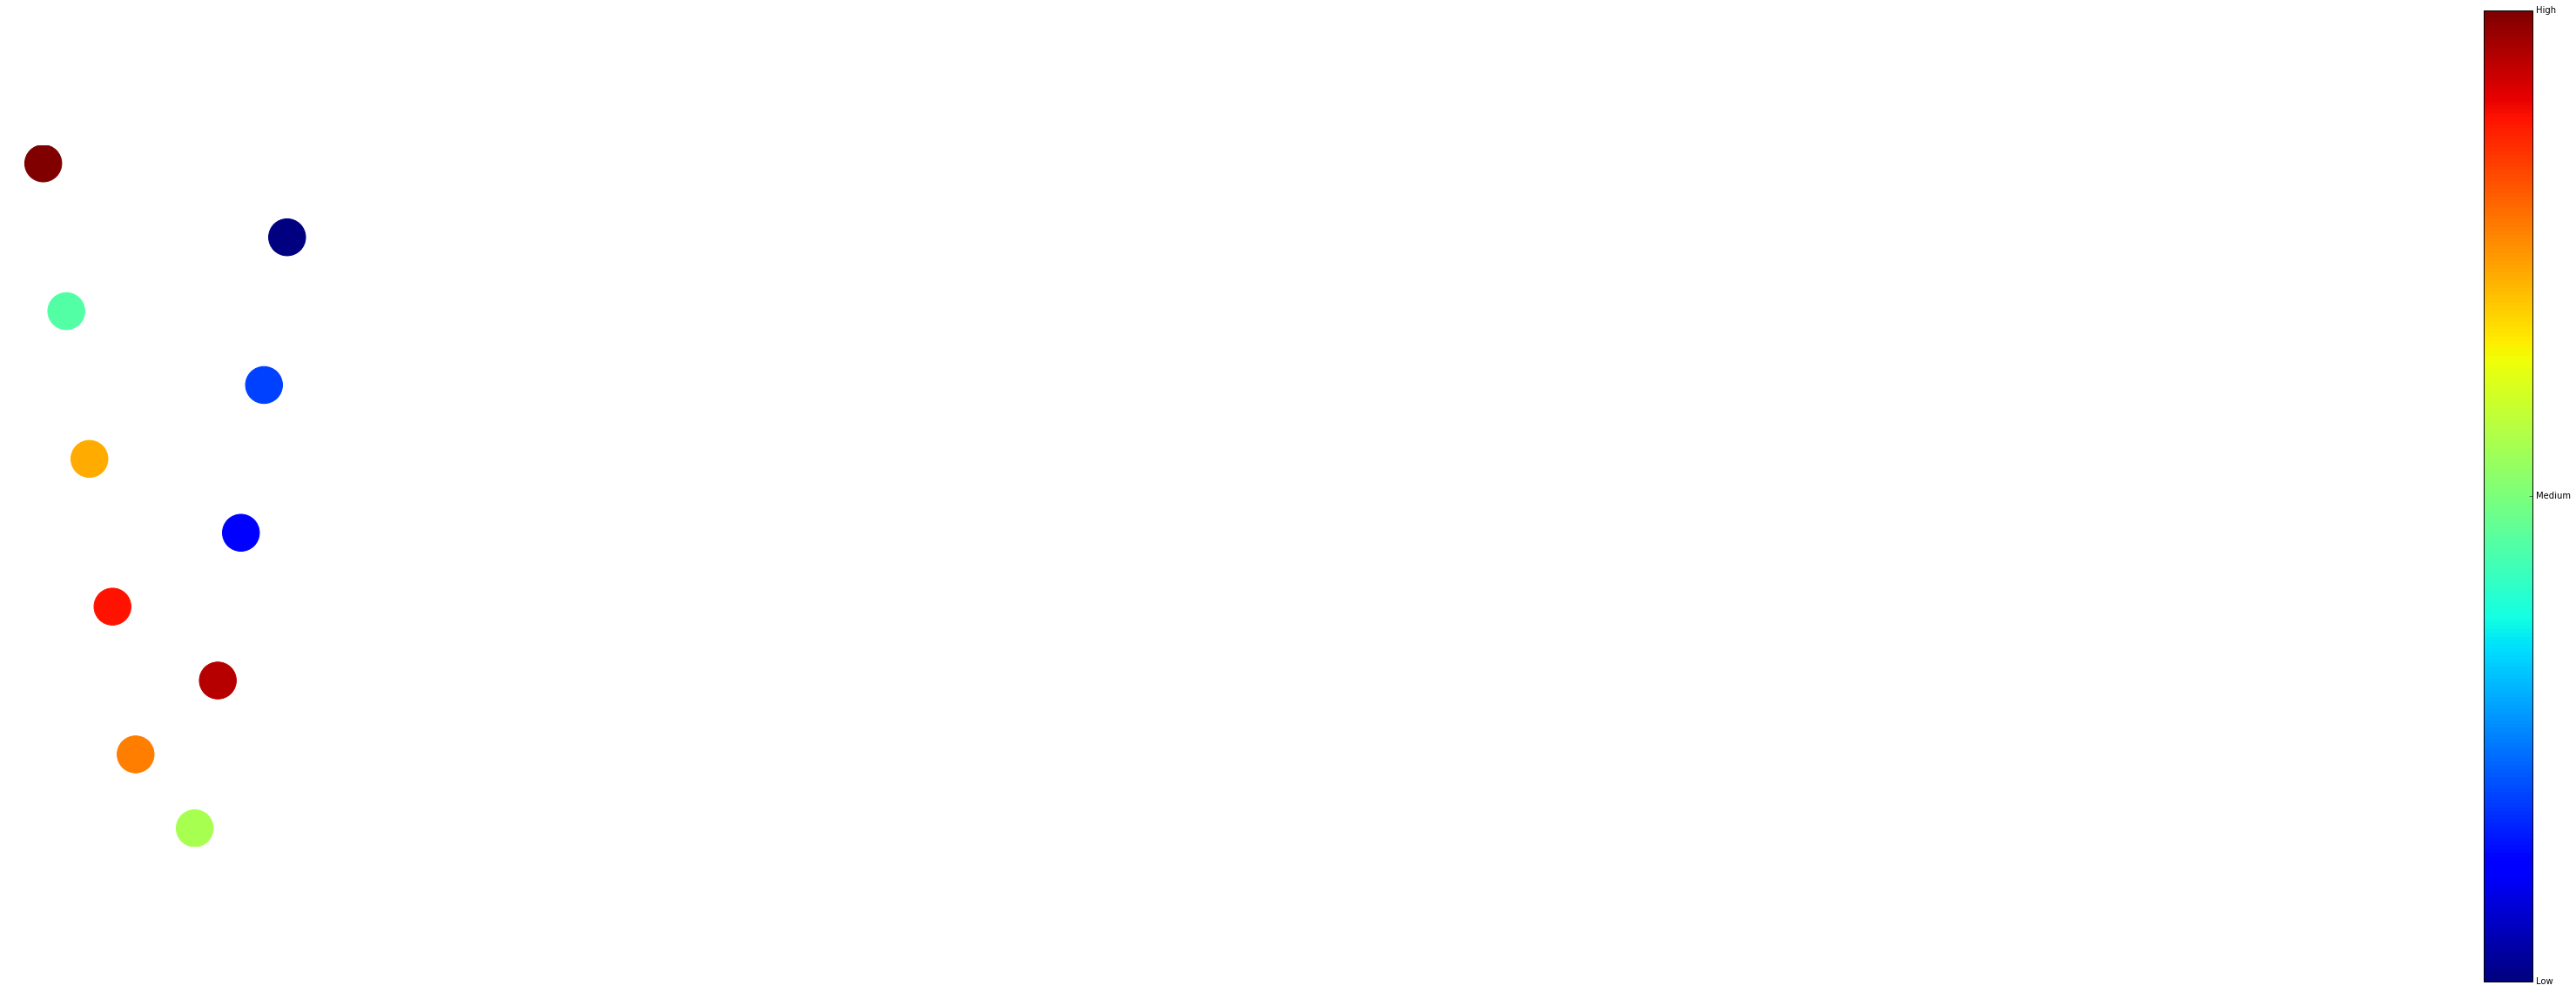

In [18]:
print(ampl)
hm.plot_median_amplitude(ampl)
#g02

In [18]:
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider, Text
import ipywidgets as widgets

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='center'
)

data = [
    Box([Label(value='Path'),
            Text("/home/harison/UFPE/data/g01.kwik")
            ], layout=form_item_layout),  
]

form = Box(data, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
display(form)

button = widgets.Button(description="Enviar informações!")
display(button)

def on_button_clicked(b):
    #kpath=form_items[0].children[0].value
    kpath=data[0].children[1].value
    hm = ColorMap(kpath)
    ampl=hm.get_median_amplitude_group()
    hm.plot_median_amplitude(ampl)
    #hm.amplitudes_heat_map(ampl)
    #group_name=
    #print("%s: %s" %(children[0].description,children[0].value))
    
    
button.on_click(on_button_clicked)

Box(children=(Box(children=(Label(value='Path'), Text(value='/home/harison/UFPE/data/g01.kwik')), layout=Layout(display='flex', flex_flow='row', justify_content='center')),), layout=Layout(align_items='stretch', border='solid 2px', display='flex', flex_flow='column', width='50%'))

Button(description='Enviar informações!', style=ButtonStyle())

Created class on = /home/harison/UFPE/data/g01.kwik !
Created class on = /home/harison/UFPE/data/g01.kwik !


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

A=dict()
for elec in range (0,wf.shape[2]):
    A[elec]=[]
    for i in range(0,len(wf)):
        wave=wf[i,:,elec]
        A[elec].append(np.max(wave)-np.min(wave))
    print ("Amplitude for electrode %d: %f" % (elec,np.mean(A[elec])))

In [26]:
kpath='/home/harison/UFPE/data/g01.kwik'
group_name='good'

In [21]:
hm = ColorMap(kpath)
ampl=hm.group_amplitude(group_name)

Created class on = /home/harison/UFPE/data/g01.kwik !
Created class on = /home/harison/UFPE/data/g01.kwik !
[ 30  78  21 ..., 121 106  16]


In [24]:
#print(ampl[0:5])
print(ampl.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

In [25]:
from klusta.kwik import KwikModel
import kwikfile as kf
import numpy as np
import time

In [30]:
clusters = km.spike_clusters(clusters=None)
print(clusters.shape)

TypeError: 'numpy.ndarray' object is not callable

In [27]:
kpath='/home/harison/UFPE/data/g01.kwik'
km=KwikModel(kpath)
KF=kf.KwikFile(kpath)

#clusters = km.spike_clusters


clu=KF.clusters(group_name="good")
#clu=[6,20]

start_time = time.time()

for cluster_id in clu:
    print(cluster_id)
    idx=np.argwhere (clusters==cluster_id)
    w=np.dstack(km.all_waveforms[idx])
    
elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

Created class on = /home/harison/UFPE/data/g01.kwik !
6
20
36
45
52
56
67
71
91
94
96
99
103
104
106
107
110
111
112
116
118
119
120
121
122


'00:14:25'

In [4]:
print(w.shape)
#(n_spikes, n_samples, n_channels)

(32, 10, 15718)


In [21]:
#for ch in range(0,10):
for t in range(0,32):
    m=np.mean(w[:,:,:],2)

In [22]:
m.shape

(32, 10)

In [23]:
print(m)

[[  4.88470459e+01   1.30235596e+02   8.61615982e+01   1.62641876e+02
    6.00426979e+01   5.33956833e+01   2.36418018e+01   1.85221920e+01
    1.09109621e+01   8.74015522e+00]
 [  5.68373985e+01   1.51560043e+02   1.00885612e+02   1.91722321e+02
    7.10848999e+01   6.34816704e+01   2.84810696e+01   2.22202892e+01
    1.32729769e+01   1.03603029e+01]
 [  6.46716919e+01   1.73290909e+02   1.15029419e+02   2.19791550e+02
    8.13850021e+01   7.34274063e+01   3.32977295e+01   2.62534256e+01
    1.59241714e+01   1.22769718e+01]
 [  7.15344696e+01   1.93498413e+02   1.27315155e+02   2.45064896e+02
    9.01046295e+01   8.19632187e+01   3.72386589e+01   3.00160675e+01
    1.78059330e+01   1.37069483e+01]
 [  7.75038300e+01   2.10974808e+02   1.38440048e+02   2.66889435e+02
    9.75037384e+01   8.86541214e+01   3.97514572e+01   3.16494923e+01
    1.81991825e+01   1.38937149e+01]
 [  8.27921677e+01   2.26567032e+02   1.47786270e+02   2.82592560e+02
    1.02625130e+02   9.30216522e+01   4.10192

In [1]:
c='a'+'b'

In [2]:
c


'ab'